In [1]:
import numpy as np
import pathlib
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
types = "think2"

In [23]:
data_dir = pathlib.Path('./data/48plots/pearsonCorr/features')

In [24]:
files = [[] for _ in range(4)]

In [25]:
files[0] = list(data_dir.glob(f"{types}*HTR*.csv"))
files[1] = list(data_dir.glob(f"{types}*CTR*.csv"))
files[2] = list(data_dir.glob(f"{types}*VIP*.csv"))
files[3] = list(data_dir.glob(f"{types}*SNY*.csv"))

In [26]:
len(files[0])

10

In [28]:
features = np.zeros((10,22,7128), dtype=np.float64)

In [29]:
for group_idx in range(4):
    for file_idx,file in enumerate(files[group_idx]):
        df = pd.read_csv(file)
        # features[group_idx][file_idx] = df.T
        features[file_idx] = df.T

In [30]:
AvgFeatures = np.mean(features, axis=0)

In [31]:
AvgFeatures.shape

(22, 7128)

In [32]:
featuresList = [[] for _ in range(4)]

In [33]:
for group_idx in range(4):
    for i in range(12):
        feature = AvgFeatures[:,i*594:(i+1)*594]
        featuresList[group_idx].append(feature)

In [34]:
print(len(featuresList), len(featuresList[0]), featuresList[0][0].shape)

4 12 (22, 594)


In [35]:
# order of features
    # df1 = pd.DataFrame(persistentEntropyPhase[0])
    # df2 = pd.DataFrame(persistentEntropyPhase[1])
    # df3 = pd.DataFrame(amplitudePhase[0])
    # df4 = pd.DataFrame(amplitudePhase[1])
    # df5 = pd.DataFrame(bettiAreaPhase[0])
    # df6 = pd.DataFrame(bettiAreaPhase[1])
    # df7 = pd.DataFrame(persistentEntropyPower[0])
    # df8 = pd.DataFrame(persistentEntropyPower[1])
    # df9 = pd.DataFrame(amplitudePower[0])
    # df10 = pd.DataFrame(amplitudePower[1])
    # df11 = pd.DataFrame(bettiAreaPower[0])
    # df12 = pd.DataFrame(bettiAreaPower[1])
    # subject = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12], axis=0)

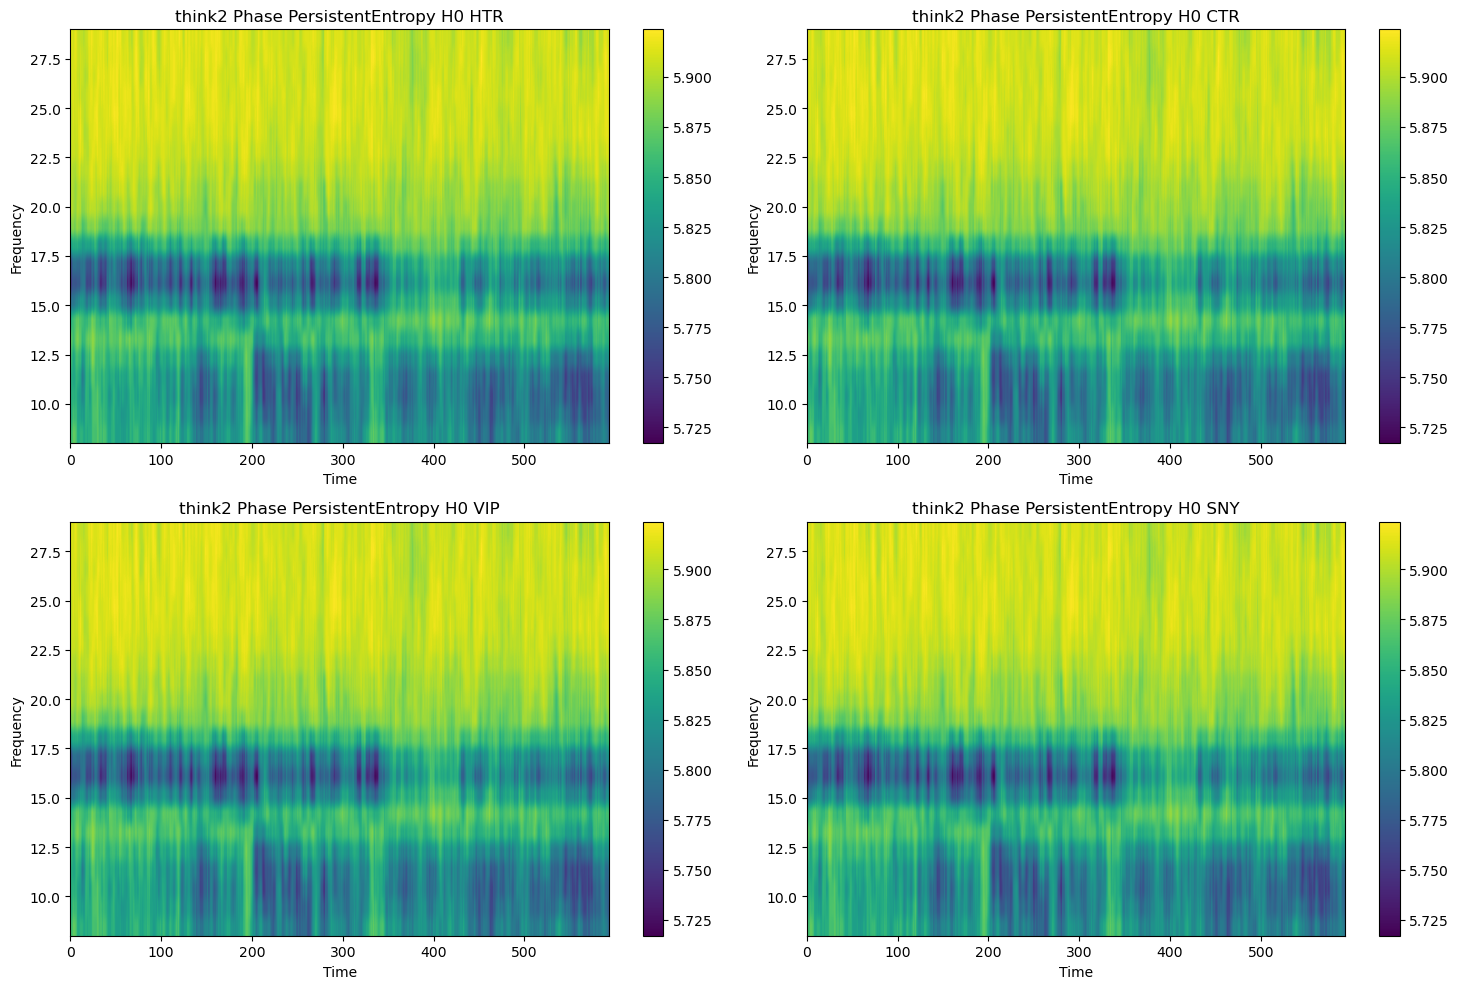

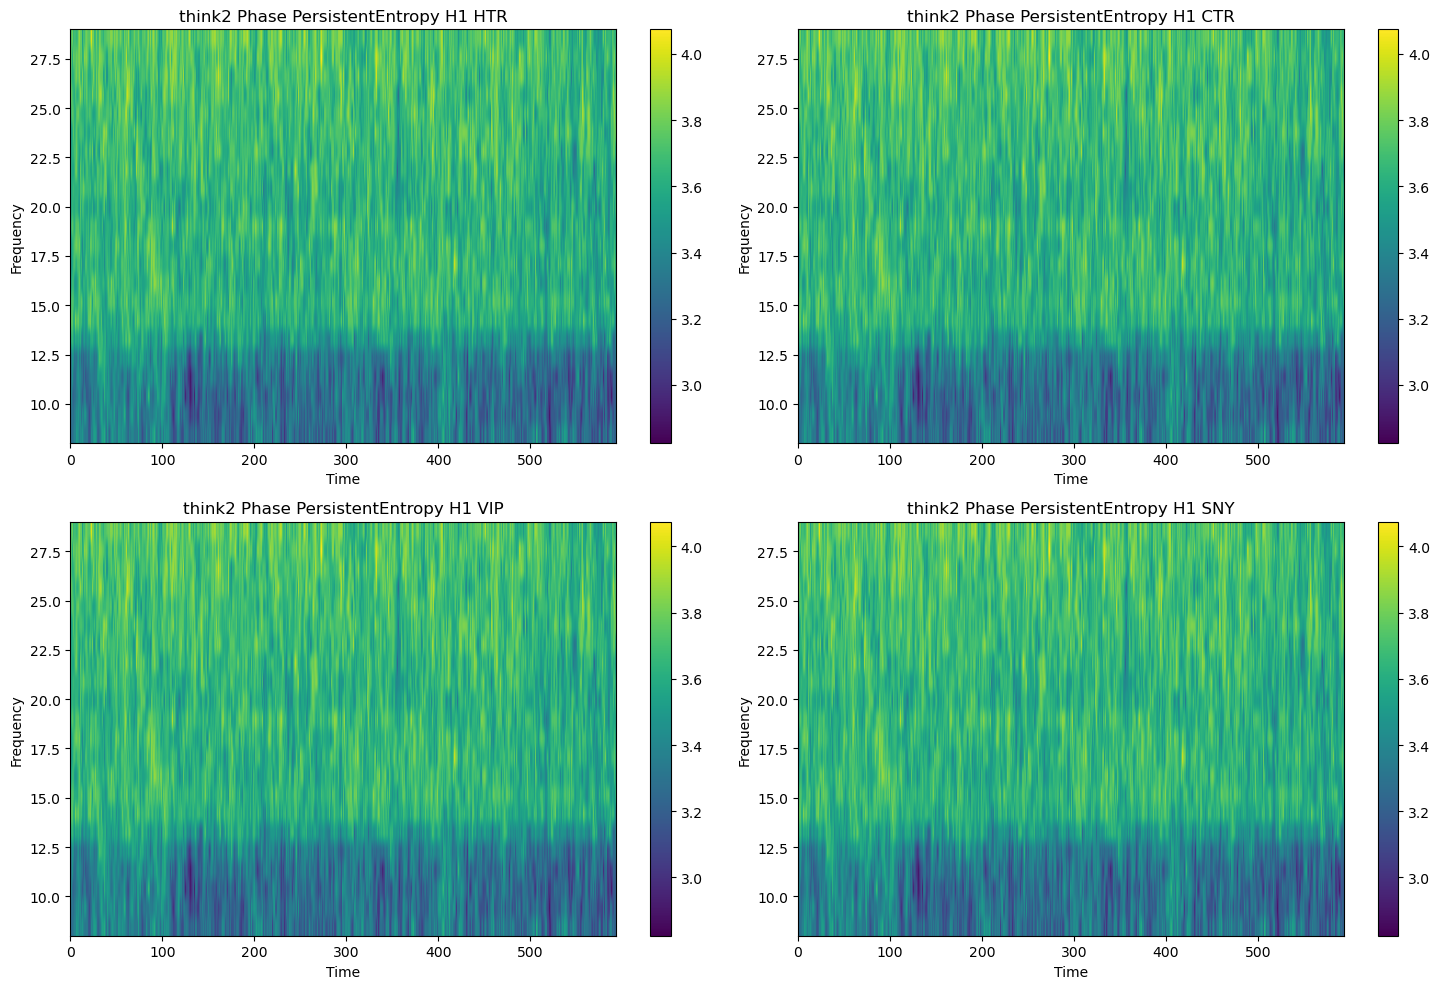

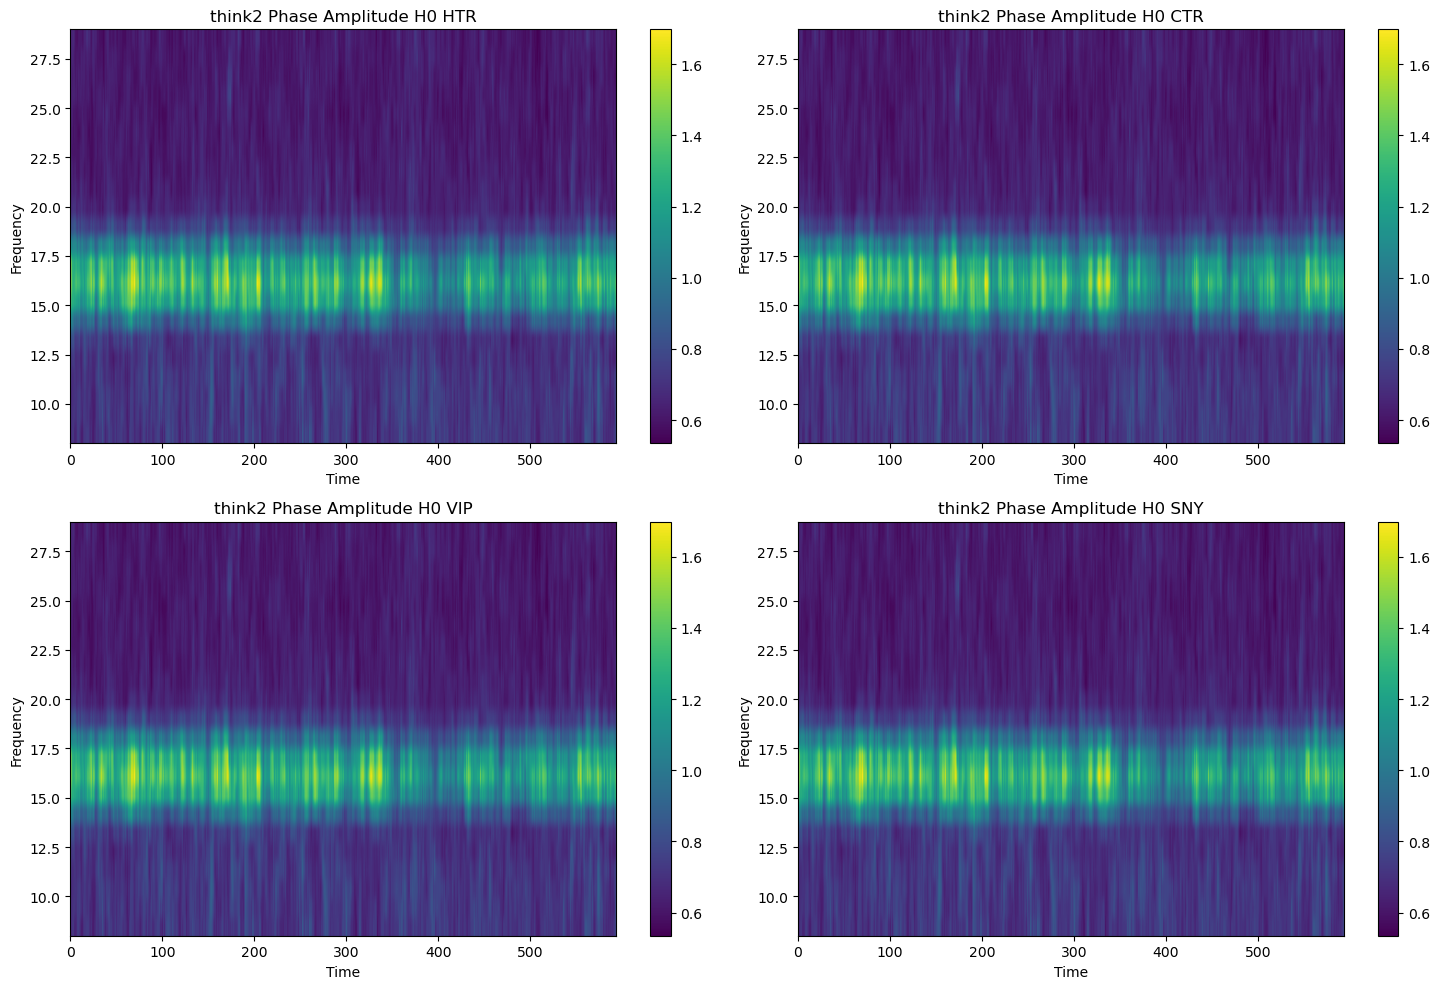

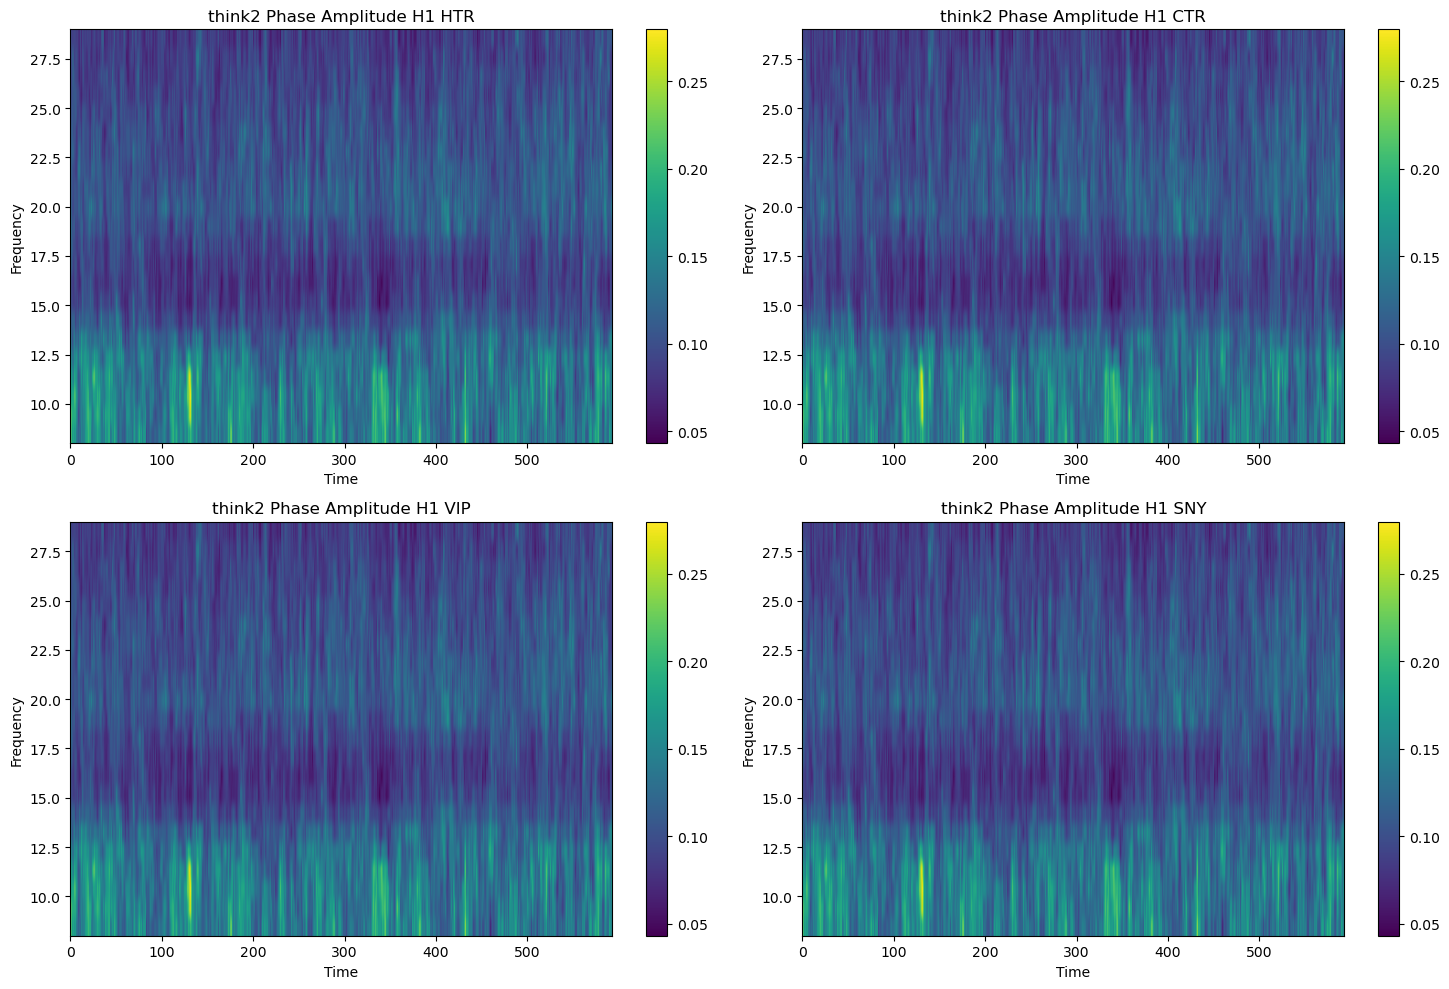

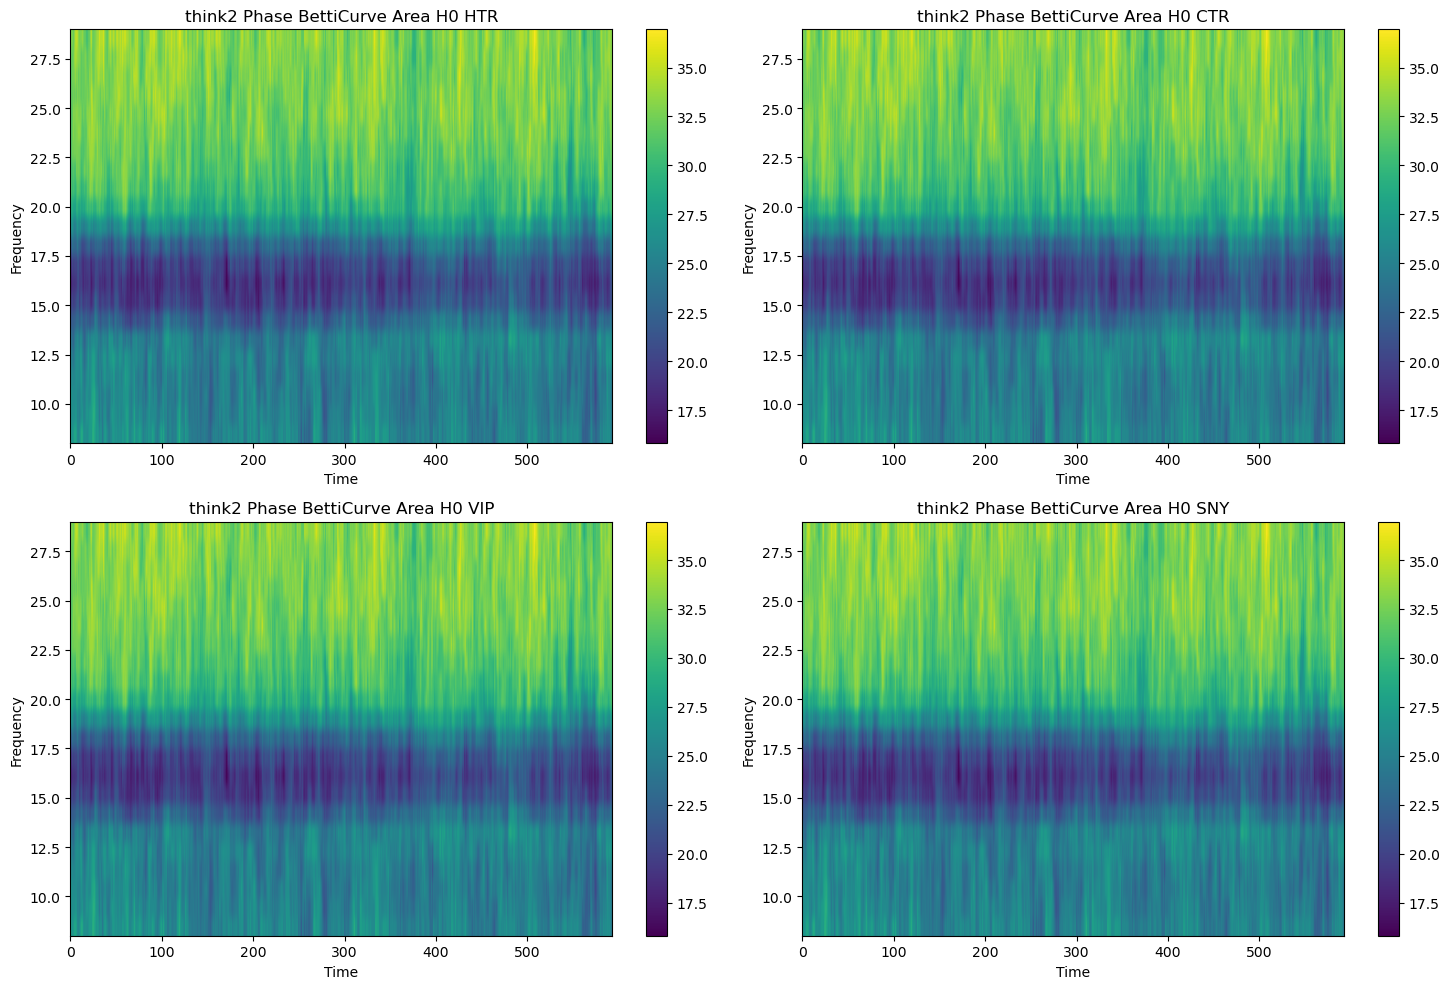

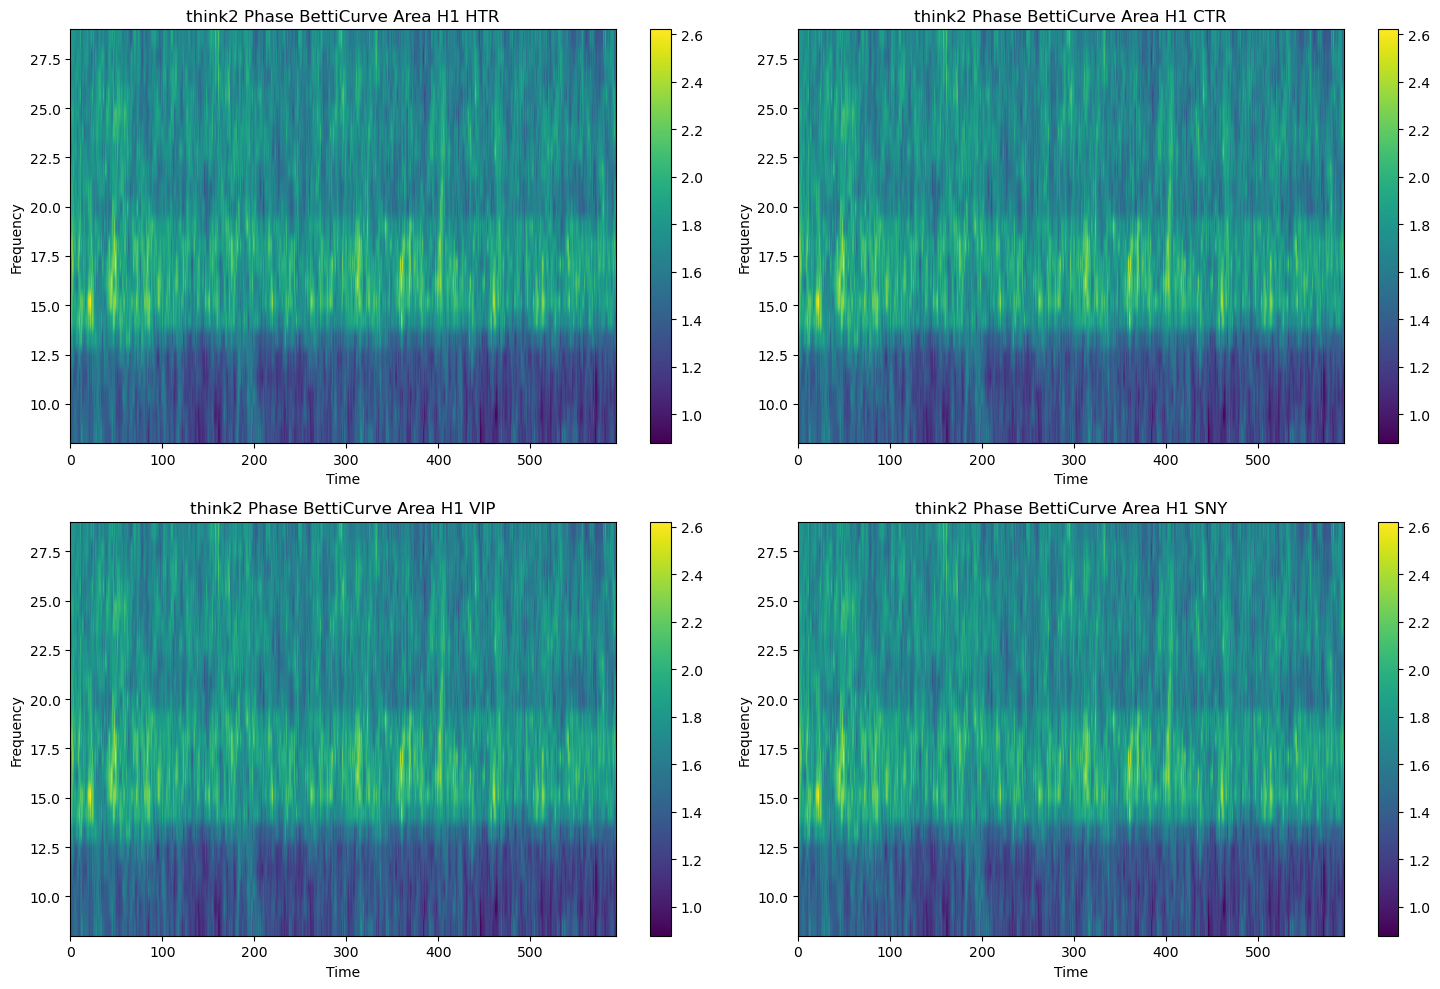

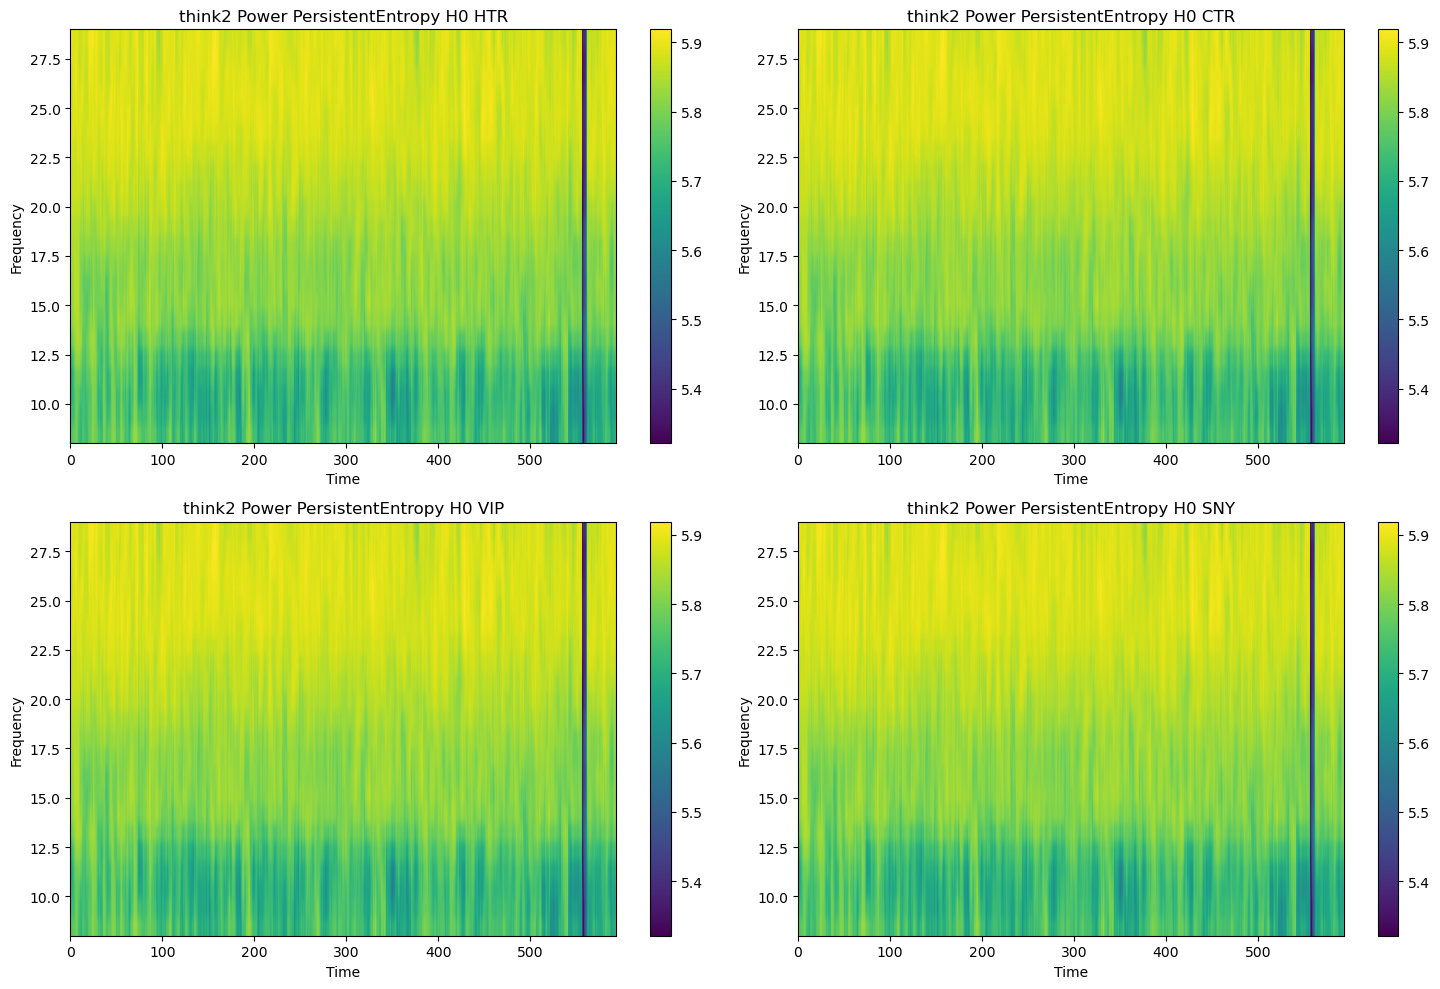

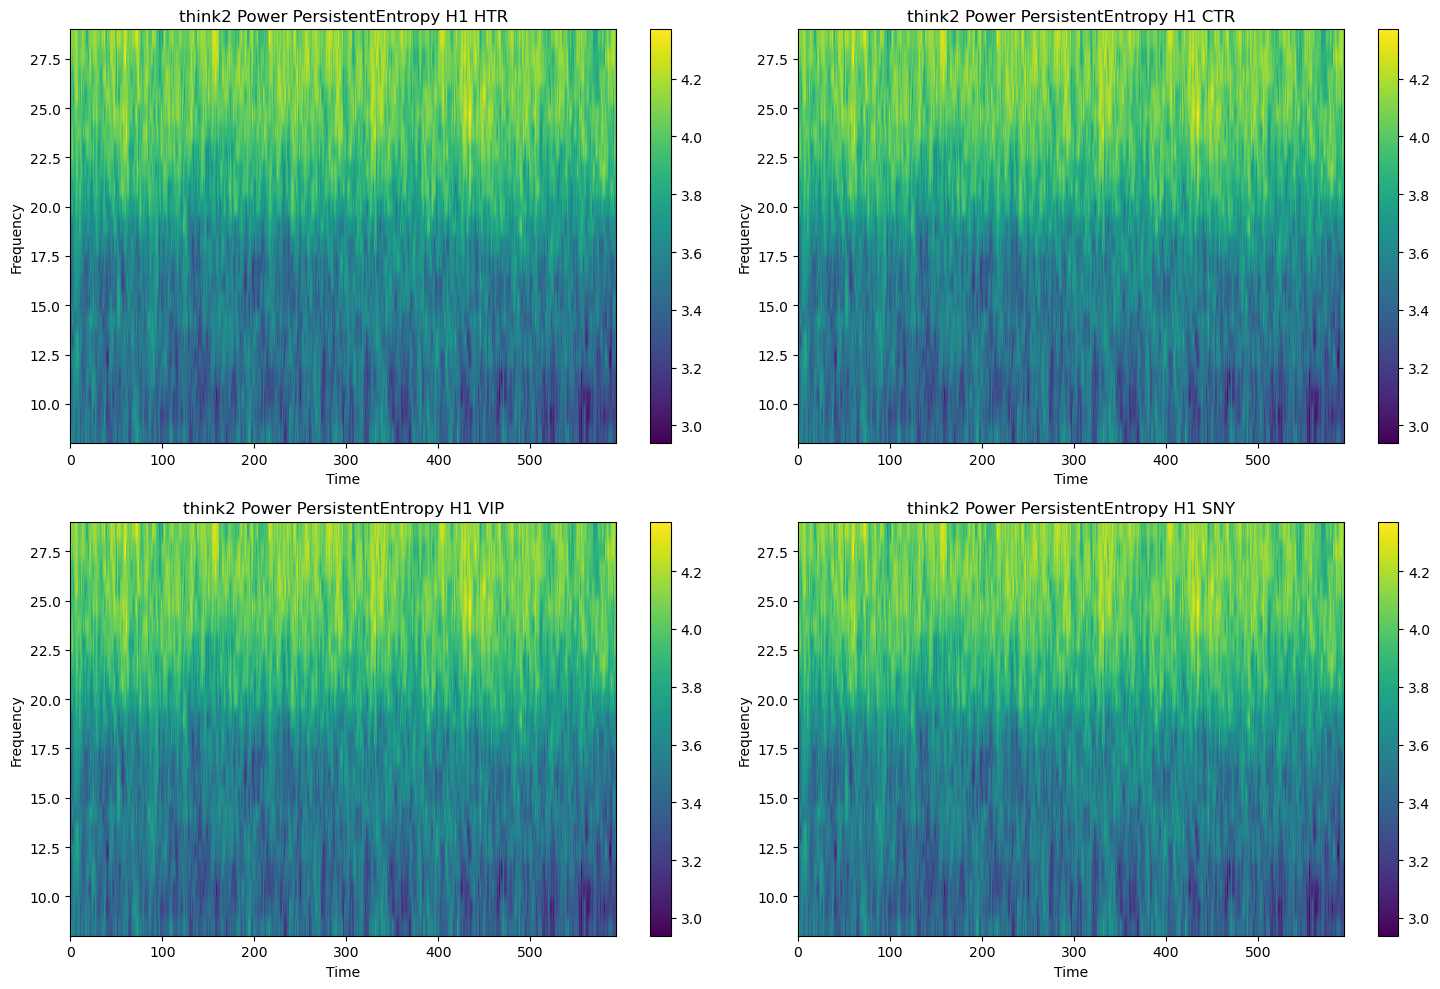

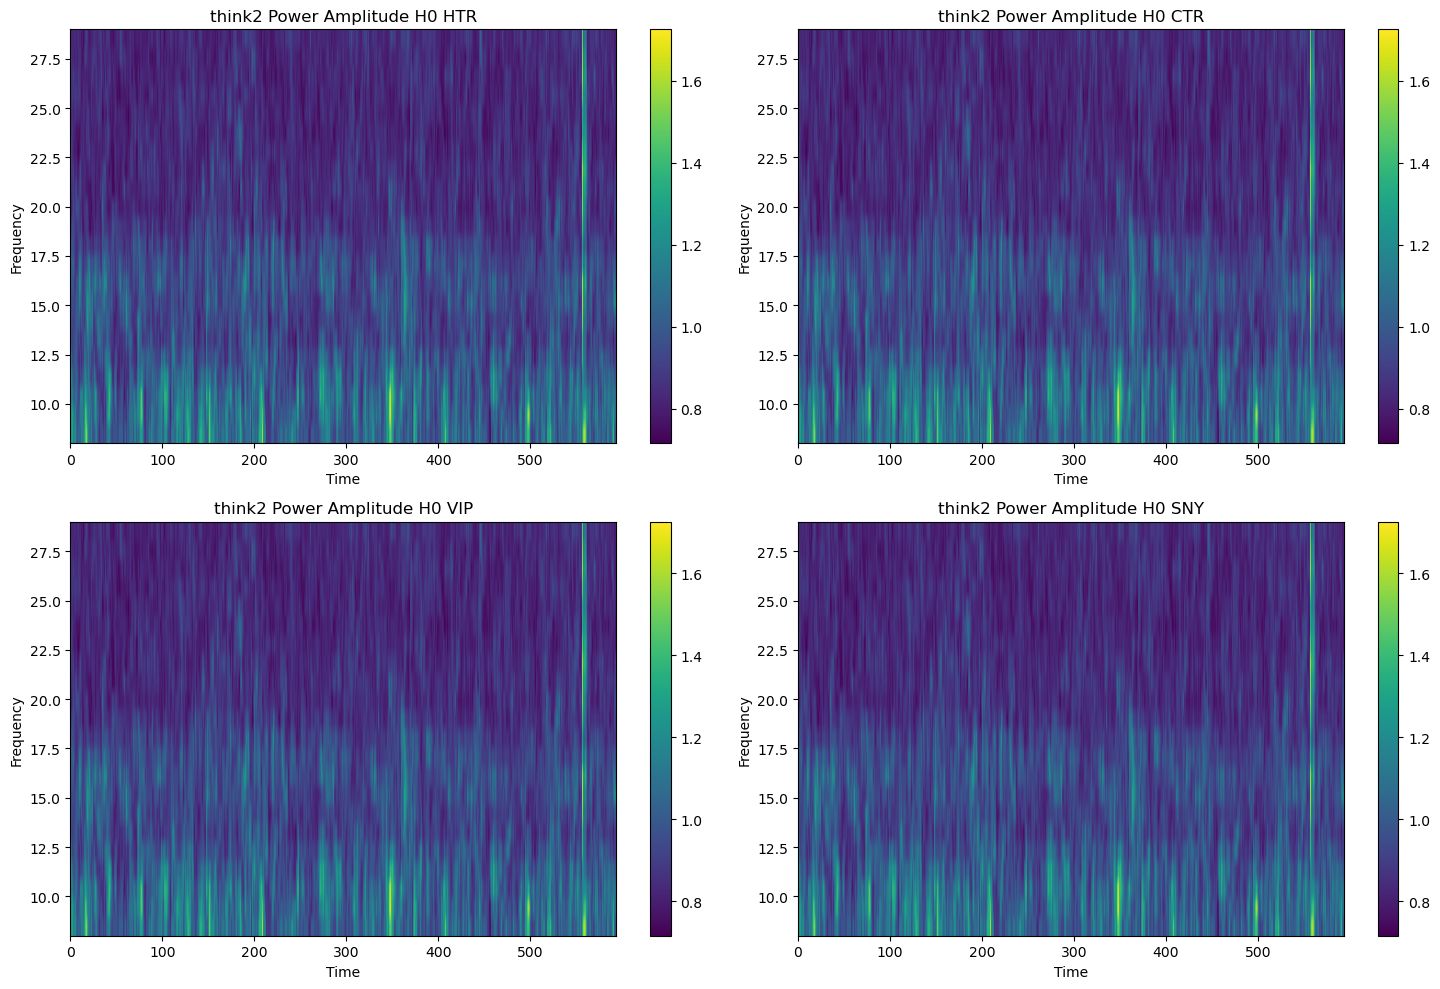

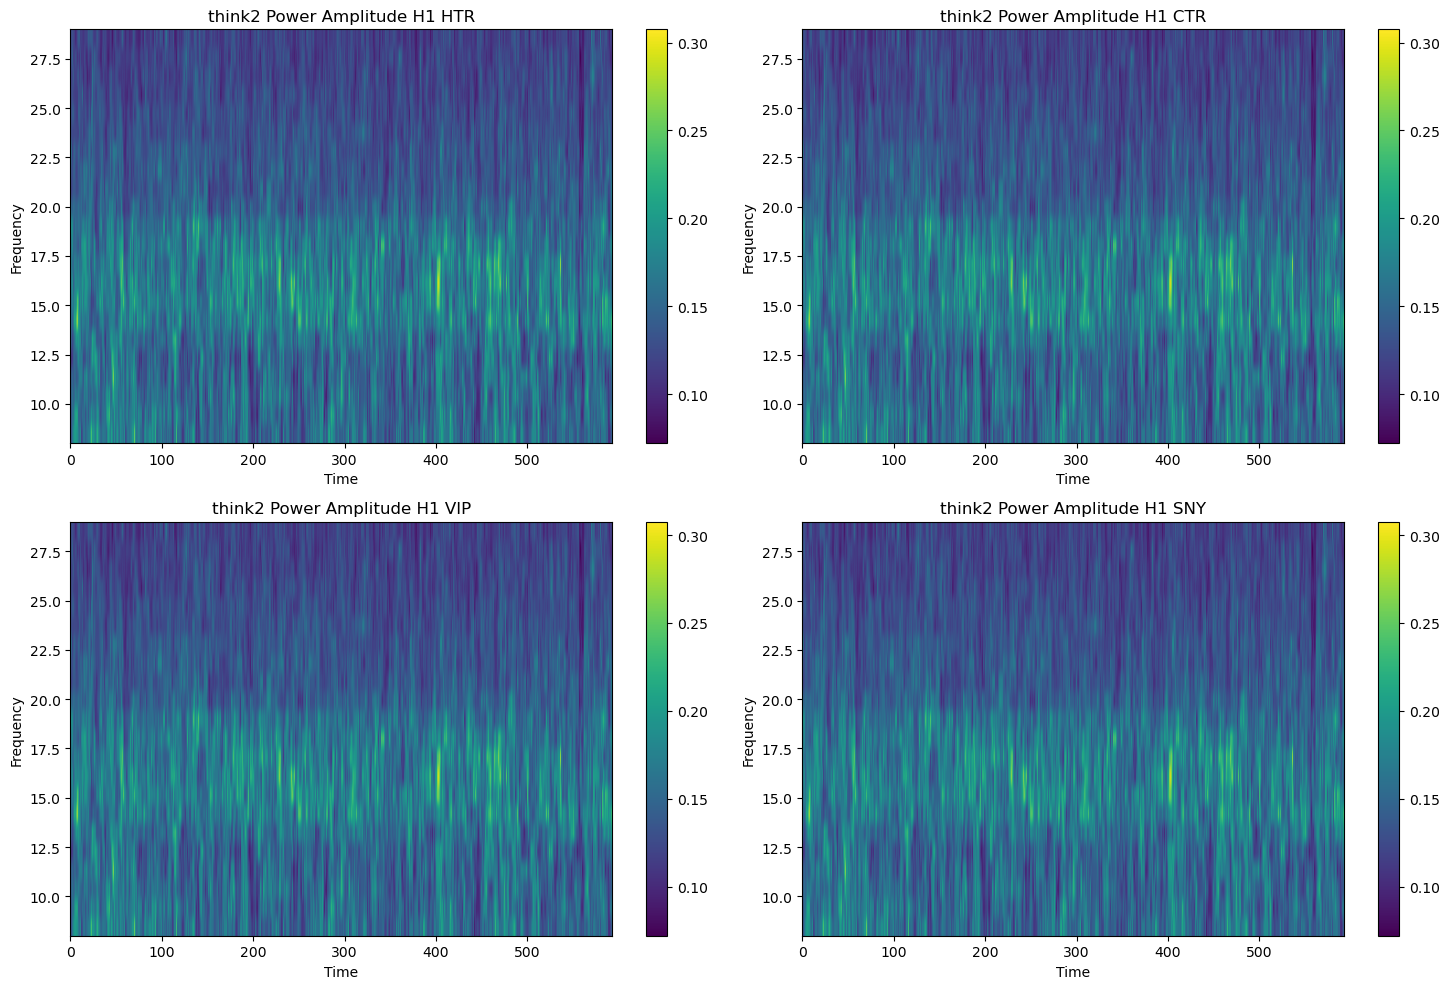

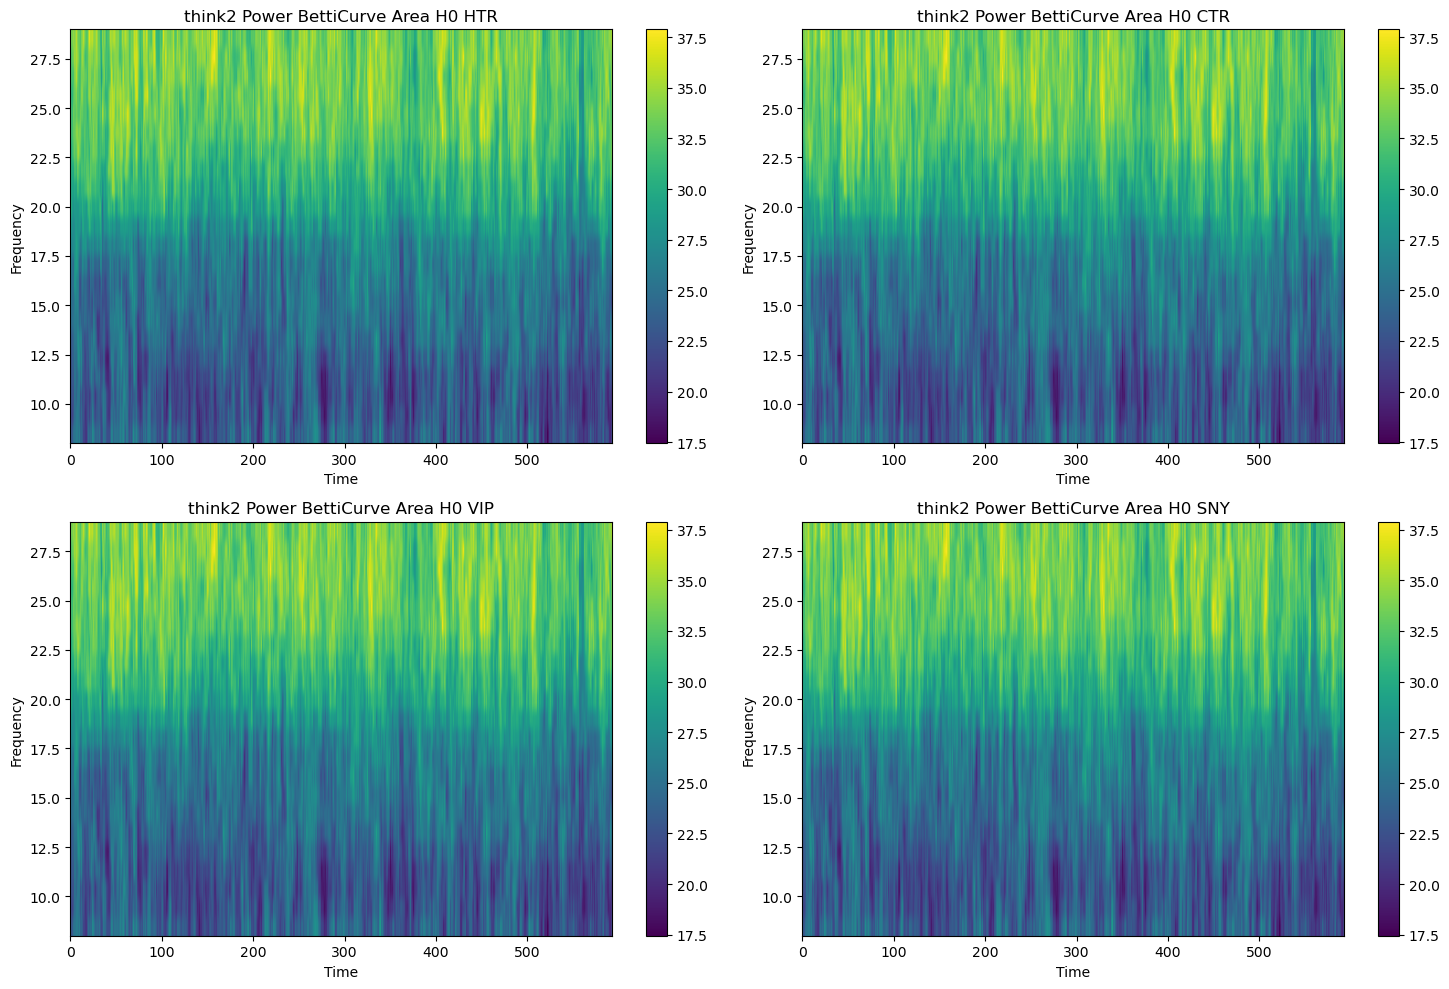

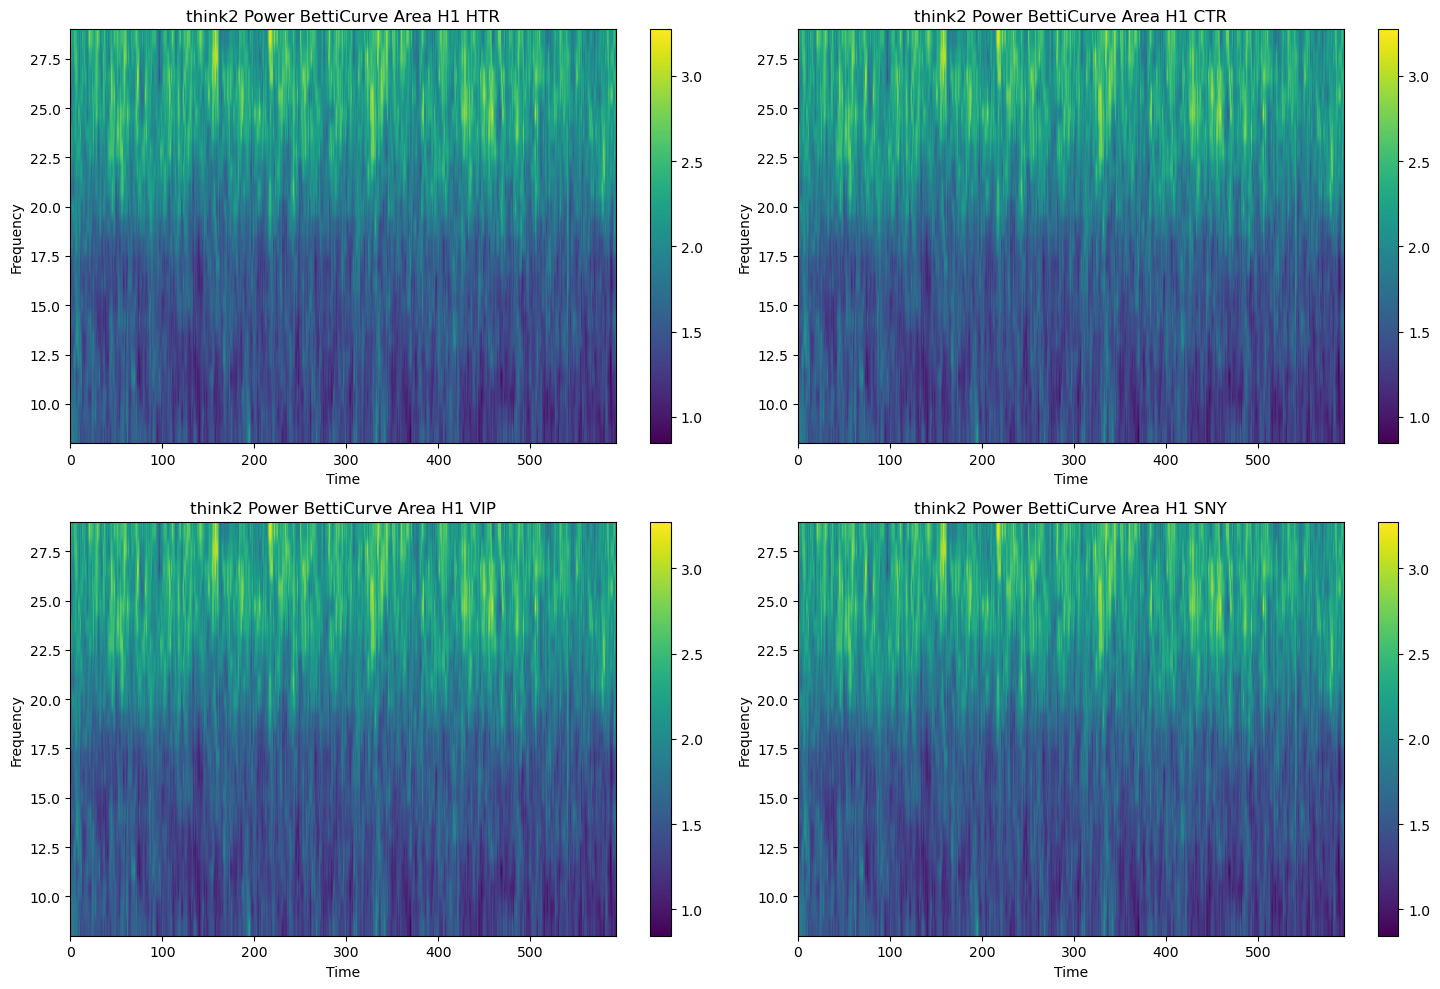

In [36]:
num_epochs = 594
frequencies = np.arange(8, 30, 1)
time_points = np.arange(0, num_epochs, 1)
featuresName = ['Phase PersistentEntropy H0','Phase PersistentEntropy H1','Phase Amplitude H0','Phase Amplitude H1','Phase BettiCurve Area H0','Phase BettiCurve Area H1',
                'Power PersistentEntropy H0','Power PersistentEntropy H1','Power Amplitude H0','Power Amplitude H1','Power BettiCurve Area H0','Power BettiCurve Area H1']
for feature_idx in range(12):
    datasets = [[featuresList[0][feature_idx],featuresList[1][feature_idx]],[featuresList[2][feature_idx],featuresList[3][feature_idx]]]
    titles = [['HTR','CTR'],['VIP','SNY']]
    fig, axes = plt.subplots(2,2,figsize=(15,10))
    for i in range(2):
        for j in range(2):
            ax = axes[i,j]
            cax = ax.imshow(datasets[i][j],aspect='auto', origin='lower', extent=[time_points.min(), time_points.max(), frequencies.min(), frequencies.max()])
            fig.colorbar(cax, ax=ax)
            ax.set_title(f'{types} {featuresName[feature_idx]} {titles[i][j]}')
            ax.set_xlabel('Time')
            ax.set_ylabel('Frequency')
    fig.tight_layout()
    fig.savefig(f'./data/48plots/pearsonCorr/plots/{types}_{featuresName[feature_idx]}.png')
    plt.show()

In [107]:
data_dir1 = pathlib.Path('./data/48plots/pearsonCorr/plots')
png = list(data_dir1.glob("*.png"))

In [108]:
png

[PosixPath('data/48plots/pearsonCorr/plots/think2_Phase PersistentEntropy H1.png'),
 PosixPath('data/48plots/pearsonCorr/plots/think2_Power Amplitude H0.png'),
 PosixPath('data/48plots/pearsonCorr/plots/think2_Power BettiCurve Area H1.png'),
 PosixPath('data/48plots/pearsonCorr/plots/think2_Phase PersistentEntropy H0.png'),
 PosixPath('data/48plots/pearsonCorr/plots/think2_Phase BettiCurve Area H0.png'),
 PosixPath('data/48plots/pearsonCorr/plots/think2_Power BettiCurve Area H0.png'),
 PosixPath('data/48plots/pearsonCorr/plots/think2_Power PersistentEntropy H1.png'),
 PosixPath('data/48plots/pearsonCorr/plots/think2_Power PersistentEntropy H0.png'),
 PosixPath('data/48plots/pearsonCorr/plots/think2_Phase BettiCurve Area H1.png'),
 PosixPath('data/48plots/pearsonCorr/plots/think2_Phase Amplitude H0.png'),
 PosixPath('data/48plots/pearsonCorr/plots/think2_Power Amplitude H1.png'),
 PosixPath('data/48plots/pearsonCorr/plots/think2_Phase Amplitude H1.png')]

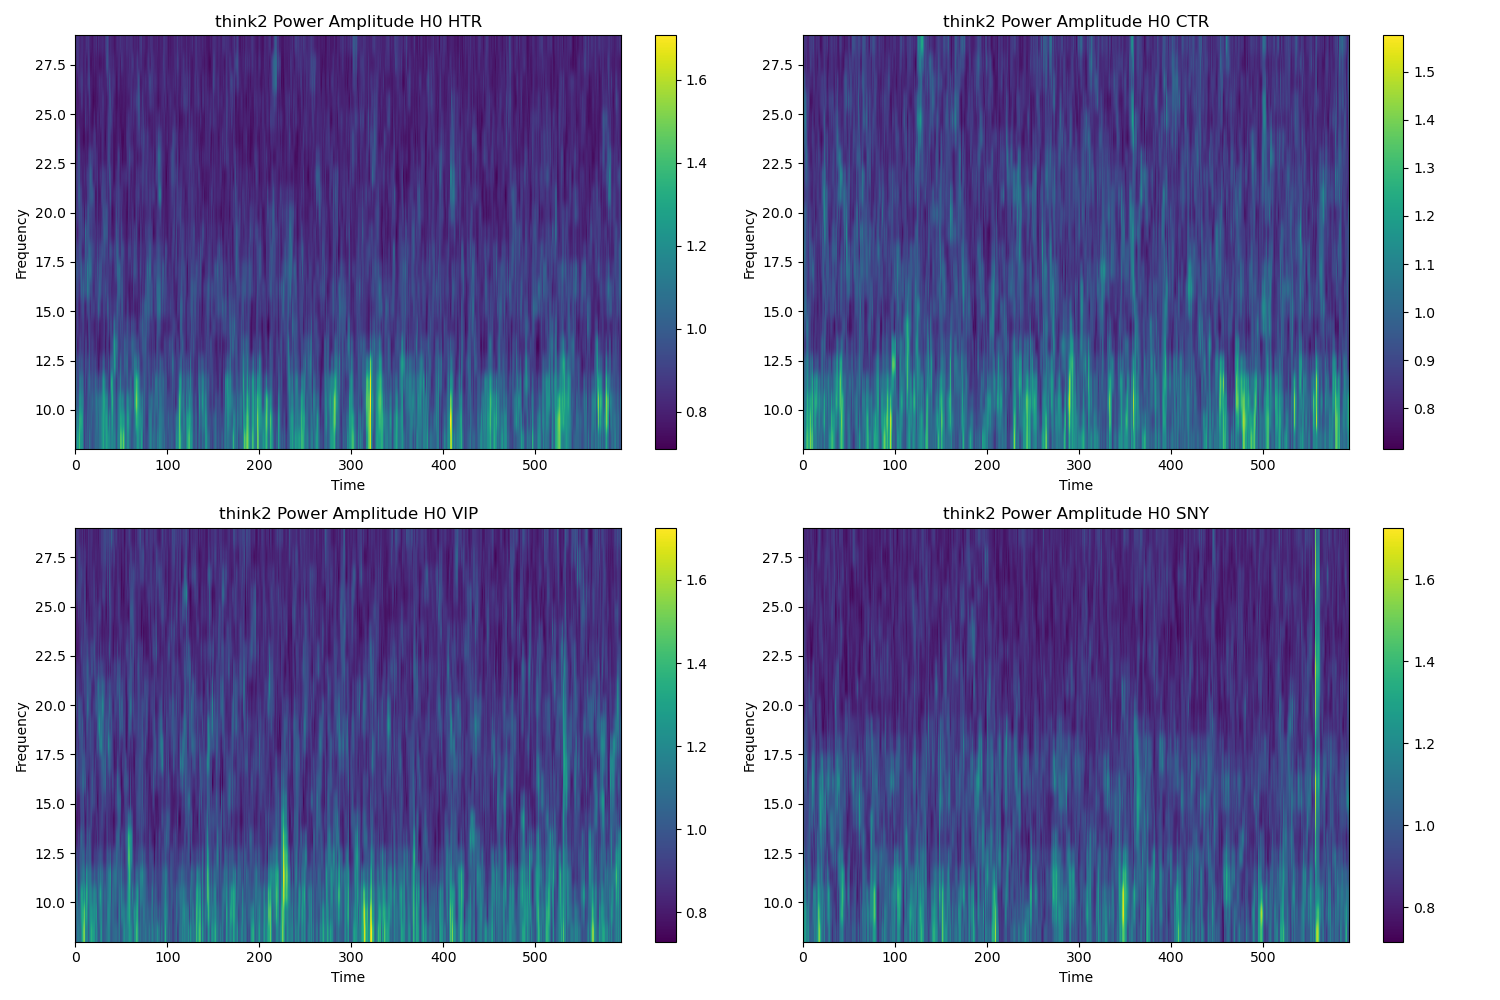

In [110]:
from PIL import Image
Image.open(png[1])